<a href="https://colab.research.google.com/github/vinit-narula/AI-ML/blob/main/6_Image_classfn_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Package

 **os** package is used to read files and directory structure

 **numpy** is used to convert python list to numpy array and to perform required  matrix operations

**matplotlib.pyplot** is used to plot the graph and display images in our training and validation data.


In [18]:
import os
import numpy as np
import glob
import shutil

import matplotlib.pyplot as plt

###Import TensorFlow and Keras Layers
Import Tensorflow as tf and the Keras layers and models you will use to build your CNN. Also, import the ImageDataGenerator from Keras to perform image augmentation.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###Data Loading
Download the dataset and extract its content


In [20]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

The dataset we downloaded contains images of 5 types of flowers:

1. Rose

2. Daisy

3. Dandelion

4. Sunflowers

5. Tulips

Now create labels

In [21]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Downloaded directory structure will look like this.
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

We now need to create training and validation set.

The code below creates a train and a val folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set. In the end our directory will have the following structure:

In [26]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images


Error: ignored

In [27]:
round(len(images)*0.8)

513

let us set up the path for the training and validation sets

In [28]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

### Data Augumentation


Set Batch and Image size

In [29]:
batch_size = 100
IMG_SHAPE = 150

Apply Random Horizontal Flip
use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the .flow_from_directory method to apply the above transformation to the images in our training set.

In [30]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

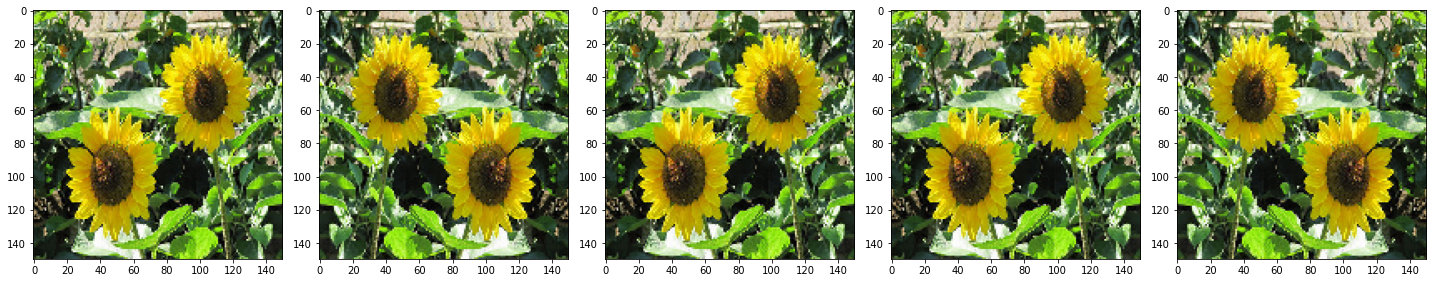

In [32]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Apply Random Rotation


In [33]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

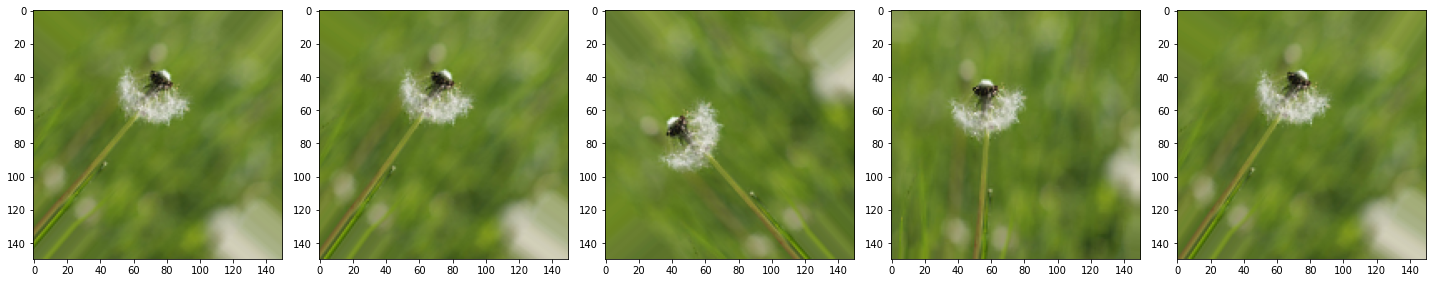

In [34]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Apply Random Zoom
applies a random zoom of up to 50%

Found 2935 images belonging to 5 classes.


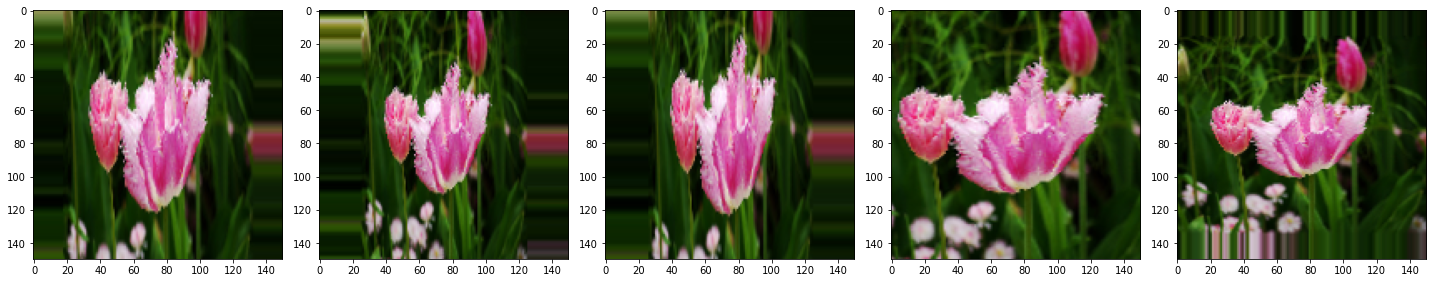

In [37]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Put It All Together

1. random 45 degree rotation
2. random zoom of up to 50%
3. random horizontal flip
4. width shift of 0.15
5. height shift of 0.15

Then use the .flow_from_directory method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to sparse.

Found 2935 images belonging to 5 classes.


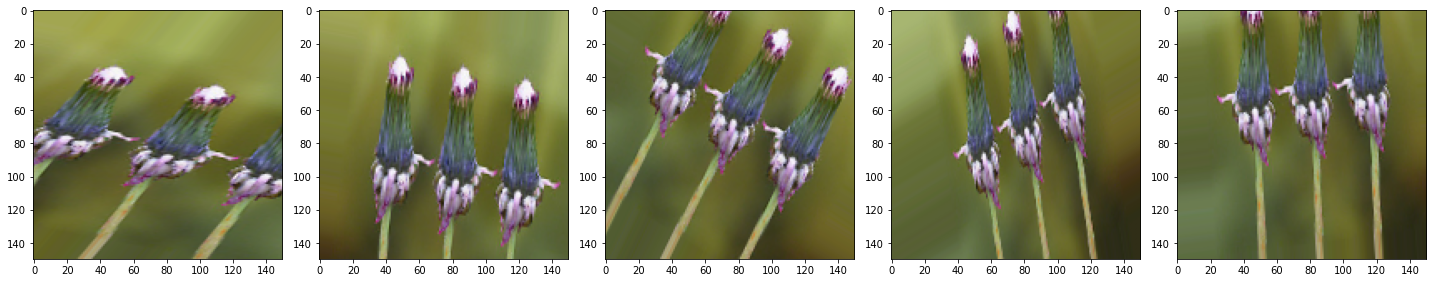

In [38]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#Create a Data Generator for the Validation Set

Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the .flow_from_directory method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to sparse. Remember that it is not necessary to shuffle the images in the validation set.

In [39]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


###Create the CNN  -- Build the Model

In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the softmax activation function. All other layers should use a relu activation function. You should also add Dropout layers with a probability of 20%, where appropriate.

In [40]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

### Compile the model

Compile the model using the ADAM optimizer, the sparse cross entropy function as a loss function. 

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Train the model using the fit_generator function instead of the usual fit function. We have to use the fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data for our model. Train the model for 80 epochs and make sure you use the proper parameters in the fit_generator function.

In [42]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
30/30 [==============================] - 28s 722ms/step - loss: 1.9252 - accuracy: 0.2839 - val_loss: 1.1822 - val_accuracy: 0.4966
Epoch 2/80
30/30 [==============================] - 22s 720ms/step - loss: 1.2257 - accuracy: 0.4715 - val_loss: 1.0490 - val_accuracy: 0.5782
Epoch 3/80
30/30 [==============================] - 22s 723ms/step - loss: 1.1639 - accuracy: 0.5293 - val_loss: 1.0358 - val_accuracy: 0.6014
Epoch 4/80
30/30 [==============================] - 22s 717ms/step - loss: 1.0358 - accuracy: 0.5899 - val_loss: 0.9249 - val_accuracy: 0.6408
Epoch 5/80
30/30 [==============================] - 21s 716ms/step - loss: 0.9690 - accuracy: 0.6181 - val_loss: 0.8855 - val_accuracy: 0.6340
Epoch 6/80
30/30 [==============================] - 22s 721ms/step - loss: 0.9390 - accuracy: 0.6285 - val_loss: 0.8767 - val_accuracy: 0.6558
Epoch 7/80
30/30 [==============================] - 21s 717ms/step - loss: 0.9440 - accuracy: 0.6360 - val_loss: 0.8570 - val_accuracy: 0.6585

###Plot Training and Validation Graphs.

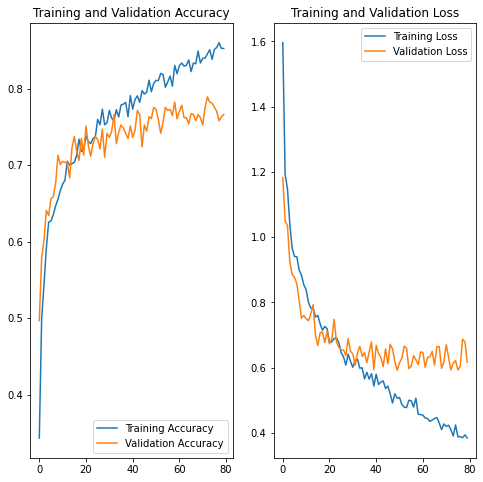

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()